In [55]:
#from datasets import *

import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import FirstOrderExpansion
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split

import time

import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from random import randint

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import svm model
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from qiskit.circuit.library import ZZFeatureMap

from random import *

import seaborn

In [56]:
def rand(x):
    m = 13093
    b = 5
    a = 6679
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 13093
    b = 5
    ainv = 10425
    return ainv * (y - 1 - b) % m

def rand2(x):
    m = 16141
    b = 5
    a = 5059
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 16141
    b = 5
    ainv = 14115
    return ainv * (y - 1 - b) % m

def modInverse(a, m) : 
    a = a % m; 
    for x in range(1, m) : 
        if ((a * x) % m == 1) : 
            return x 
    return 1

#print(modInverse(5059,16141))

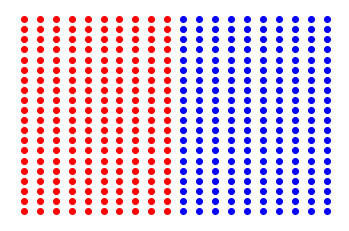

In [57]:
set1=[]
set2=[]

for i in range(0, 20):
    for j in range(0, 20):
        if i >=10:
            set1.append([i, j])
        else:
            set2.append([i,j])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")

plt.xticks([])
plt.yticks([])

seaborn.despine(right=True, bottom =True, left=True)
plt.savefig('adhoc1.png', bbox_inches='tight', pad_inches=0)

plt.show();

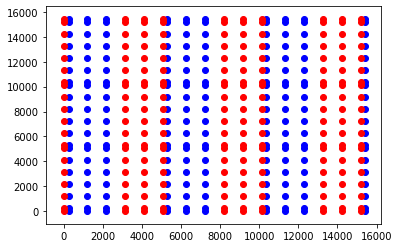

In [58]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [5]:
#Classical, non random

data = []
labels = []

for i in range(0, 20):
    for j in range(0, 20):
        data.append([i, j])      
        if (i >= 10):
            labels.append(0)
        else:
            labels.append(1)
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 1.0
Accuracy (with preprocess): 0.9772727272727273


In [6]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.5
Accuracy (with preprocess): 0.553030303030303


In [62]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

294.61414766311646
testing success ratio: 0.4318181818181818


In [63]:
#Quantum, non-random, scaled

conductor_train, conductor_test = train_test_split(scaler.fit_transform(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(scaler.fit_transform(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

330.23711943626404
testing success ratio: 0.5


In [15]:
#Quantum, tandom

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

304.8376352787018
testing success ratio: 0.5


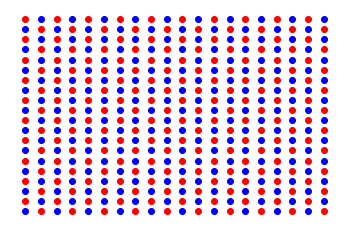

In [53]:
set1=[]
set2=[]

for i in range(0, 20):
    for j in range(0, 20):
        if (i+j) % 2 == 0:
            set1.append([i, j])
        else:
            set2.append([i,j])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")

plt.xticks([])
plt.yticks([])

seaborn.despine(right=True, bottom =True, left=True)
plt.savefig('adhoc2.png', bbox_inches='tight', pad_inches=0)
plt.show();

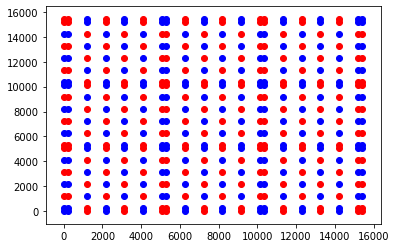

In [17]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [18]:
#Classical, non random

data = []
labels = []

for i in range(0, 20):
    for j in range(0, 20):
        data.append([i, j])      
        if (i+j) % 2 == 0:
            labels.append(0)
        else:
            labels.append(1)
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.4772727272727273
Accuracy (with preprocess): 0.4696969696969697


In [19]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.48484848484848486
Accuracy (with preprocess): 0.48484848484848486


In [20]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

305.0591809749603
testing success ratio: 0.48484848484848486


In [21]:
#Quantum, tandom

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

305.9400062561035
testing success ratio: 0.48484848484848486


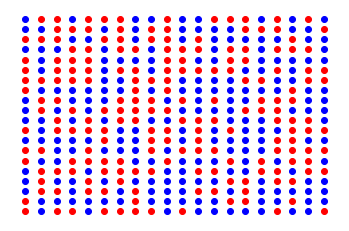

In [54]:
set1=[]
set2=[]

for i in range(0, 20):
    for j in range(0, 20):
        if (randint(0,1)) == 0:
            set1.append([i, j])
        else:
            set2.append([i,j])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")

plt.xticks([])
plt.yticks([])

seaborn.despine(right=True, bottom =True, left=True)
plt.savefig('adhoc3.png', bbox_inches='tight', pad_inches=0)

plt.show();

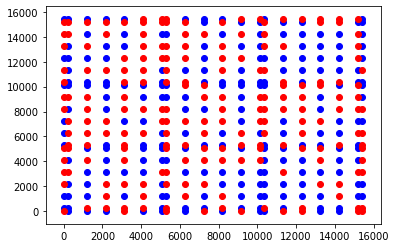

In [23]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [24]:
#Classical, non random

data = []
labels = []

for i in range(0, len(set1)):
    data.append(set1[i])
    labels.append(0)
    
for i in range(0, len(set2)):
    data.append(set2[i])
    labels.append(1)
                
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.4621212121212121
Accuracy (with preprocess): 0.4696969696969697


In [25]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.45454545454545453
Accuracy (with preprocess): 0.45454545454545453


In [26]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

305.4595766067505
testing success ratio: 0.5488721804511278


In [27]:
#Quantum, tandom

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

306.45536828041077
testing success ratio: 0.48872180451127817


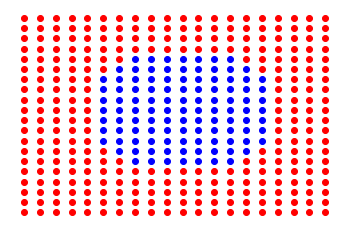

In [4]:
set1=[]
set2=[]

for i in range(0, 20):
    for j in range(0, 20):
        if np.sqrt((i-10)**2+(j-10)**2) < 6:
            set1.append([i, j])
        else:
            set2.append([i,j])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")

plt.xticks([])
plt.yticks([])

seaborn.despine(right=True, bottom =True, left=True)
plt.savefig('adhoc4.png', bbox_inches='tight', pad_inches=0)


plt.show();

In [5]:
len(set2)/(len(set1)+len(set2))

0.7275

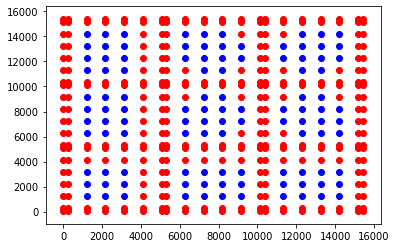

In [6]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [9]:
#Classical, non random

data = []
labels = []

for i in range(0, len(set1)):
    data.append(set1[i])
    labels.append(0)
    
for i in range(0, len(set2)):
    data.append(set2[i])
    labels.append(1)
                
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.6818181818181818
Accuracy (with preprocess): 0.6818181818181818


In [10]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.6818181818181818
Accuracy (with preprocess): 0.6818181818181818


In [11]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data, total_array)

from qiskit import IBMQ
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_santiago')

#backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

qsvm.save_model('C:\\Users\\admin\\Desktop\\QQML\\Code\\Saved_SVMs\\circlerealsantiago')

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

print("prediction:   {}".format(resultnonrand['predicted_classes']))

configrc.store_credentials:WARNING:2020-08-12 17:53:22,525: Credentials already present. Set overwrite=True to overwrite.
The skip Qobj validation does not work for IBMQ provider. Disable it.
Job limit reached, waiting for job 5f3464d6d12df70012914eb1 to finish before submitting the next one.
Job limit reached, waiting for job 5f3464d8412f5100138e267b to finish before submitting the next one.
Job limit reached, waiting for job 5f3464d933d1830013d5a65c to finish before submitting the next one.
Job limit reached, waiting for job 5f3464daa9bb0e00112e7c6e to finish before submitting the next one.
Job limit reached, waiting for job 5f3464dba556f30013db3845 to finish before submitting the next one.
Job limit reached, waiting for job 5f346580a712620012181d67 to finish before submitting the next one.
Job limit reached, waiting for job 5f3465bae38c2d00120d66f3 to finish before submitting the next one.
Job limit reached, waiting for job 5f3465f3e38c2d00120d66f9 to finish before submitting the ne

Job limit reached, waiting for job 5f348ac6eab8a000132c15c4 to finish before submitting the next one.
Job limit reached, waiting for job 5f348b0187dba500132811d9 to finish before submitting the next one.
Job limit reached, waiting for job 5f348b3dcfe224001341a4f4 to finish before submitting the next one.
Job limit reached, waiting for job 5f348d74a556f30013db3adc to finish before submitting the next one.
Job limit reached, waiting for job 5f348d75d12df70012915150 to finish before submitting the next one.
Job limit reached, waiting for job 5f348d77a71262001218201d to finish before submitting the next one.
Job limit reached, waiting for job 5f348d7887dba500132811fd to finish before submitting the next one.
Job limit reached, waiting for job 5f348d79eab8a000132c15e4 to finish before submitting the next one.
Job limit reached, waiting for job 5f348e3deab8a000132c15f1 to finish before submitting the next one.
Job limit reached, waiting for job 5f348e79cfe224001341a525 to finish before submi

Job limit reached, waiting for job 5f34ad0bd12df70012915389 to finish before submitting the next one.
Job limit reached, waiting for job 5f34ad0ceab8a000132c182e to finish before submitting the next one.
Job limit reached, waiting for job 5f34aeb5412f5100138e2b69 to finish before submitting the next one.
Job limit reached, waiting for job 5f34aeeee38c2d00120d6bca to finish before submitting the next one.
Job limit reached, waiting for job 5f34af29412f5100138e2b6f to finish before submitting the next one.
Job limit reached, waiting for job 5f34af63e38c2d00120d6bd1 to finish before submitting the next one.
Job limit reached, waiting for job 5f34b19bd12df700129153f1 to finish before submitting the next one.
Job limit reached, waiting for job 5f34b19bd12df700129153f1 to finish before submitting the next one.
Job limit reached, waiting for job 5f34b19c87dba50013281491 to finish before submitting the next one.
Job limit reached, waiting for job 5f34b19d412f5100138e2bd0 to finish before submi

Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submitting the next one.
Job limit reached, waiting for job 5f34cac24016e1001335c18c to finish before submi

Job limit reached, waiting for job 5f351789f1bf7c00135f369e to finish before submitting the next one.
Job limit reached, waiting for job 5f3518074973c60013f38242 to finish before submitting the next one.
Job limit reached, waiting for job 5f3518424973c60013f3824b to finish before submitting the next one.
Job limit reached, waiting for job 5f35187cd749f50013fb7688 to finish before submitting the next one.
Job limit reached, waiting for job 5f3518b61f15a40012a15128 to finish before submitting the next one.
Job limit reached, waiting for job 5f351b9140252c001316d7f6 to finish before submitting the next one.
Job limit reached, waiting for job 5f351b92ed92660013b59c5d to finish before submitting the next one.
Job limit reached, waiting for job 5f351b934973c60013f3829b to finish before submitting the next one.
Job limit reached, waiting for job 5f351b941da1d8001262c643 to finish before submitting the next one.
Job limit reached, waiting for job 5f351b95f1bf7c00135f36f9 to finish before submi

Job limit reached, waiting for job 5f353d5c1f15a40012a1539b to finish before submitting the next one.
Job limit reached, waiting for job 5f353d5ded92660013b59e9e to finish before submitting the next one.
Job limit reached, waiting for job 5f353d5e887a0b0013bd90e4 to finish before submitting the next one.
Job limit reached, waiting for job 5f353dd01da1d8001262c885 to finish before submitting the next one.
Job limit reached, waiting for job 5f353e0d1da1d8001262c889 to finish before submitting the next one.
Job limit reached, waiting for job 5f353e5df1bf7c00135f3957 to finish before submitting the next one.
Job limit reached, waiting for job 5f353e9a40252c001316da50 to finish before submitting the next one.
Job limit reached, waiting for job 5f35413740252c001316da70 to finish before submitting the next one.
Job limit reached, waiting for job 5f3541394973c60013f384d3 to finish before submitting the next one.
Job limit reached, waiting for job 5f35413a4973c60013f384d4 to finish before submi

Job limit reached, waiting for job 5f355fb740252c001316dc0c to finish before submitting the next one.
Job limit reached, waiting for job 5f355fb84973c60013f3866c to finish before submitting the next one.
Job limit reached, waiting for job 5f355fb9d749f50013fb7ac6 to finish before submitting the next one.
Job limit reached, waiting for job 5f356011887a0b0013bd92bd to finish before submitting the next one.
Job limit reached, waiting for job 5f35604c1f15a40012a15575 to finish before submitting the next one.
Job limit reached, waiting for job 5f356084d749f50013fb7ad5 to finish before submitting the next one.
Job limit reached, waiting for job 5f3560c172630d00137a0367 to finish before submitting the next one.
Job limit reached, waiting for job 5f35635ded92660013b5a0c0 to finish before submitting the next one.
Job limit reached, waiting for job 5f35635efae9350012fd7999 to finish before submitting the next one.
Job limit reached, waiting for job 5f35635f1f15a40012a155a2 to finish before submi

Job limit reached, waiting for job 5f35826472630d00137a0535 to finish before submitting the next one.
Job limit reached, waiting for job 5f3584b31da1d8001262cc73 to finish before submitting the next one.
Job limit reached, waiting for job 5f3584b5f1bf7c00135f3d11 to finish before submitting the next one.
Job limit reached, waiting for job 5f3584b640252c001316de2f to finish before submitting the next one.
Job limit reached, waiting for job 5f3584b7d749f50013fb7cba to finish before submitting the next one.
Job limit reached, waiting for job 5f3584b8fae9350012fd7b89 to finish before submitting the next one.
Job limit reached, waiting for job 5f3585bf887a0b0013bd94ad to finish before submitting the next one.
Job limit reached, waiting for job 5f3585f9887a0b0013bd94b0 to finish before submitting the next one.
Job limit reached, waiting for job 5f35863540252c001316de40 to finish before submitting the next one.
Job limit reached, waiting for job 5f35867340252c001316de43 to finish before submi

80909.02879571915
testing success ratio: 0.7293233082706767
prediction:   ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [12]:
#Quantum, random, real

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data, total_array)

from qiskit import IBMQ
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_santiago')

#backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

qsvm.save_model('C:\\Users\\admin\\Desktop\\QQML\\Code\\Saved_SVMs\\circlerandrealsantiago')

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultrand['testing_accuracy']))

print("prediction:   {}".format(resultrand['predicted_classes']))

configrc.store_credentials:WARNING:2020-08-13 21:44:19,279: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-08-13 21:44:19,553: Credentials are already in use. The existing account in the session will be replaced.
The skip Qobj validation does not work for IBMQ provider. Disable it.
Job limit reached, waiting for job 5f35ec7740252c001316e3fe to finish before submitting the next one.
Job limit reached, waiting for job 5f35ec7740252c001316e3fe to finish before submitting the next one.
Job limit reached, waiting for job 5f35ec791f15a40012a15d39 to finish before submitting the next one.
Job limit reached, waiting for job 5f35ec7a1f15a40012a15d3a to finish before submitting the next one.
Job limit reached, waiting for job 5f35ec7ced92660013b5a87e to finish before submitting the next one.
Job limit reached, waiting for job 5f35ec7d4973c60013f38e08 to finish before submitting the next one.
Job limit reached, waiting for job 5f35edc3f1bf7c001

Job limit reached, waiting for job 5f360e224973c60013f38fc2 to finish before submitting the next one.
Job limit reached, waiting for job 5f360e231da1d8001262d400 to finish before submitting the next one.
Job limit reached, waiting for job 5f360e244973c60013f38fc3 to finish before submitting the next one.
Job limit reached, waiting for job 5f360e26887a0b0013bd9c64 to finish before submitting the next one.
Job limit reached, waiting for job 5f360e27d749f50013fb8450 to finish before submitting the next one.
Job limit reached, waiting for job 5f360e6d40252c001316e5a4 to finish before submitting the next one.
Job limit reached, waiting for job 5f360ea71da1d8001262d404 to finish before submitting the next one.
Job limit reached, waiting for job 5f360ee14973c60013f38fcc to finish before submitting the next one.
Job limit reached, waiting for job 5f360f1ced92660013b5aa44 to finish before submitting the next one.
Job limit reached, waiting for job 5f361189887a0b0013bd9c8d to finish before submi

Job limit reached, waiting for job 5f36338172630d00137a0eed to finish before submitting the next one.
Job limit reached, waiting for job 5f3633bcfae9350012fd84dc to finish before submitting the next one.
Job limit reached, waiting for job 5f3633fb1f15a40012a1610f to finish before submitting the next one.
Job limit reached, waiting for job 5f3634324973c60013f391d6 to finish before submitting the next one.
Job limit reached, waiting for job 5f3636931f15a40012a16136 to finish before submitting the next one.
Job limit reached, waiting for job 5f3636941f15a40012a16137 to finish before submitting the next one.
Job limit reached, waiting for job 5f363695887a0b0013bd9e73 to finish before submitting the next one.
Job limit reached, waiting for job 5f363697d749f50013fb8680 to finish before submitting the next one.
Job limit reached, waiting for job 5f36369872630d00137a0f19 to finish before submitting the next one.
Job limit reached, waiting for job 5f3636d31f15a40012a16139 to finish before submi

Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submitting the next one.
Job limit reached, waiting for job 5f364a9fd749f50013fb8789 to finish before submi

Job limit reached, waiting for job 5f36958e1da1d8001262dbba to finish before submitting the next one.
Job limit reached, waiting for job 5f36979540252c001316ed77 to finish before submitting the next one.
Job limit reached, waiting for job 5f36979540252c001316ed77 to finish before submitting the next one.
Job limit reached, waiting for job 5f36979640252c001316ed78 to finish before submitting the next one.
Job limit reached, waiting for job 5f3697974973c60013f397bf to finish before submitting the next one.
Job limit reached, waiting for job 5f369798d749f50013fb8c16 to finish before submitting the next one.
Job limit reached, waiting for job 5f369799f1bf7c00135f4c4a to finish before submitting the next one.
Job limit reached, waiting for job 5f36993e72630d00137a14fb to finish before submitting the next one.
Job limit reached, waiting for job 5f36997940252c001316ed92 to finish before submitting the next one.
Job limit reached, waiting for job 5f3699b44973c60013f397db to finish before submi

Job limit reached, waiting for job 5f36bbc51da1d8001262dd9f to finish before submitting the next one.
Job limit reached, waiting for job 5f36bbc7887a0b0013bda603 to finish before submitting the next one.
Job limit reached, waiting for job 5f36bc8c4973c60013f39983 to finish before submitting the next one.
Job limit reached, waiting for job 5f36bcc6fae9350012fd8cb7 to finish before submitting the next one.
Job limit reached, waiting for job 5f36bd021da1d8001262ddae to finish before submitting the next one.
Job limit reached, waiting for job 5f36bd3f1f15a40012a168e3 to finish before submitting the next one.
Job limit reached, waiting for job 5f36bf83f1bf7c00135f4e38 to finish before submitting the next one.
Job limit reached, waiting for job 5f36bf8540252c001316ef8a to finish before submitting the next one.
Job limit reached, waiting for job 5f36bf86ed92660013b5b441 to finish before submitting the next one.
Job limit reached, waiting for job 5f36bf871da1d8001262ddc8 to finish before submi

Job limit reached, waiting for job 5f36dcb11f15a40012a16aa7 to finish before submitting the next one.
Job limit reached, waiting for job 5f36dcb240252c001316f139 to finish before submitting the next one.
Job limit reached, waiting for job 5f36dcfcf1bf7c00135f4fc5 to finish before submitting the next one.
Job limit reached, waiting for job 5f36dd37887a0b0013bda7d2 to finish before submitting the next one.
Job limit reached, waiting for job 5f36dd741da1d8001262df77 to finish before submitting the next one.
Job limit reached, waiting for job 5f36ddaf887a0b0013bda7db to finish before submitting the next one.
Job limit reached, waiting for job 5f36e021d749f50013fb9011 to finish before submitting the next one.
Job limit reached, waiting for job 5f36e022ed92660013b5b617 to finish before submitting the next one.
Job limit reached, waiting for job 5f36e024fae9350012fd8e9d to finish before submitting the next one.
Job limit reached, waiting for job 5f36e025f1bf7c00135f4ffa to finish before submi

Job limit reached, waiting for job 5f36ff33ed92660013b5b7fd to finish before submitting the next one.
Job limit reached, waiting for job 5f36ff34ed92660013b5b800 to finish before submitting the next one.
Job limit reached, waiting for job 5f36ff3640252c001316f33d to finish before submitting the next one.
Job limit reached, waiting for job 5f36ff38f1bf7c00135f51e8 to finish before submitting the next one.
Job limit reached, waiting for job 5f36ff82887a0b0013bda9d7 to finish before submitting the next one.
Job limit reached, waiting for job 5f36ffbd887a0b0013bda9db to finish before submitting the next one.
Job limit reached, waiting for job 5f36fff8f1bf7c00135f51f5 to finish before submitting the next one.
Job limit reached, waiting for job 5f370033ed92660013b5b80c to finish before submitting the next one.
Job limit reached, waiting for job 5f3703f5d749f50013fb9244 to finish before submitting the next one.
Job limit reached, waiting for job 5f3703f6f1bf7c00135f522b to finish before submi

Job limit reached, waiting for job 5f372df2ed92660013b5b9e0 to finish before submitting the next one.
Job limit reached, waiting for job 5f372df440252c001316f545 to finish before submitting the next one.
Job limit reached, waiting for job 5f372df6887a0b0013bdabb2 to finish before submitting the next one.
Job limit reached, waiting for job 5f372df74973c60013f39f4e to finish before submitting the next one.
Job limit reached, waiting for job 5f372ed2f1bf7c00135f53b9 to finish before submitting the next one.
Job limit reached, waiting for job 5f372f10f1bf7c00135f53be to finish before submitting the next one.
Job limit reached, waiting for job 5f372f6ded92660013b5b9f2 to finish before submitting the next one.
Job limit reached, waiting for job 5f372fa81da1d8001262e37d to finish before submitting the next one.
Job limit reached, waiting for job 5f3733681da1d8001262e39f to finish before submitting the next one.
Job limit reached, waiting for job 5f37336a1f15a40012a16ef7 to finish before submi

86238.83804392815


NameError: name 'resultrand' is not defined

In [13]:
print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

print("prediction:   {}".format(resultnonrand['predicted_classes']))

testing success ratio: 0.7293233082706767
prediction:   ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [ ]:
#Quantum, tandom

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

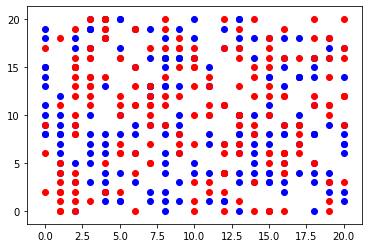

In [34]:
set1=[]
set2=[]

for i in range(0, 400):
    if randint(0,1) == 1:
        set1.append([randint(0, 20), randint(0, 20)])
    else:
        set2.append([randint(0, 20), randint(0, 20)])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")
plt.show();

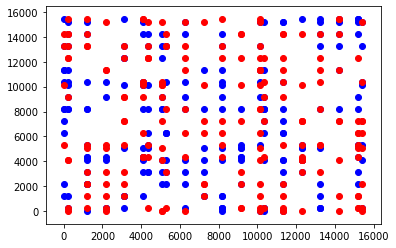

In [35]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [36]:
#Classical, non random

data = []
labels = []

for i in range(0, len(set1)):
    data.append(set1[i])
    labels.append(0)
    
for i in range(0, len(set2)):
    data.append(set2[i])
    labels.append(1)
                
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.4772727272727273
Accuracy (with preprocess): 0.5075757575757576


In [37]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.4772727272727273
Accuracy (with preprocess): 0.5303030303030303


In [38]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

299.55164217948914
testing success ratio: 0.5263157894736842


In [39]:
#Quantum, tandom

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

302.036497592926
testing success ratio: 0.5112781954887218


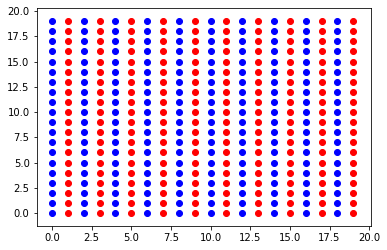

In [40]:
set1=[]
set2=[]

for i in range(0, 20):
    for j in range(0, 20):
        if i % 2== 0:
            set1.append([i, j])
        else:
            set2.append([i,j])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")
plt.show();

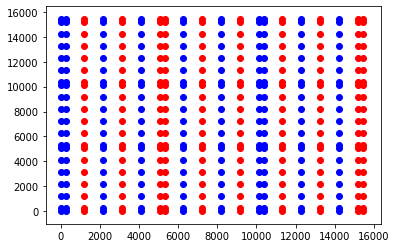

In [41]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [42]:
#Classical, non random

data = []
labels = []

for i in range(0, len(set1)):
    data.append(set1[i])
    labels.append(0)
    
for i in range(0, len(set2)):
    data.append(set2[i])
    labels.append(1)
                
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.4318181818181818
Accuracy (with preprocess): 0.4318181818181818


In [43]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.5757575757575758
Accuracy (with preprocess): 0.5833333333333334


In [44]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

307.5254831314087
testing success ratio: 0.4772727272727273


In [45]:
#Quantum, tandom

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

307.7855670452118
testing success ratio: 0.4696969696969697


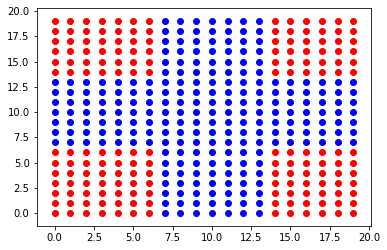

In [46]:
set1=[]
set2=[]

for i in range(0, 20):
    for j in range(0, 20):
        if (i > 6 and i < 14) or (j > 6 and j < 14):
            set1.append([i, j])
        else:
            set2.append([i,j])
            
set1 = np.asarray(set1)
set2 = np.asarray(set2)

plt.scatter(set1[:, 0], set1[:, 1], color = "blue")
plt.scatter(set2[:, 0], set2[:, 1], color = "red")
plt.show();

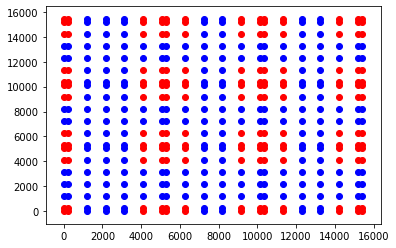

In [47]:
set1rand = rand2(set1)
set2rand = rand2(set2)

plt.scatter(set1rand[:, 0], set1rand[:, 1], color = "blue")
plt.scatter(set2rand[:, 0], set2rand[:, 1], color = "red")
plt.show();

In [48]:
#Classical, non random

data = []
labels = []

for i in range(0, len(set1)):
    data.append(set1[i])
    labels.append(0)
    
for i in range(0, len(set2)):
    data.append(set2[i])
    labels.append(1)
                
                
data=np.asarray(data)
labels = np.asarray(labels)
                
X_train, x_test, Y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.5757575757575758
Accuracy (with preprocess): 0.5757575757575758


In [49]:
#Classical random

X_train, x_test, Y_train, y_test = train_test_split(rand2(data), rand2(labels), test_size=0.33, random_state=42)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (no preprocess):",metrics.accuracy_score(y_test, y_pred))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(x_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test_std)

# Model Accuracy: how often is the classifier correct?
print("Accuracy (with preprocess):",metrics.accuracy_score(y_test, y_pred))

Accuracy (no preprocess): 0.5757575757575758
Accuracy (with preprocess): 0.5757575757575758


In [50]:
#Quantum, non-random

conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

307.02217745780945
testing success ratio: 0.5789473684210527


In [51]:
#Quantum, random

conductor_train, conductor_test = train_test_split(rand2(set1), test_size=0.33, random_state=42)
insulator_train, insulator_test = train_test_split(rand2(set2), test_size=0.33, random_state=42)

training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}

total_array = np.concatenate((test_data['A'], test_data['B']))

start = time.time()

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_data, test_data)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

resultnonrand = qsvm.run(quantum_instance)

end = time.time()
print(end - start)

print("testing success ratio: {}".format(resultnonrand['testing_accuracy']))

307.3175137042999
testing success ratio: 0.556390977443609


In [45]:
def checkAllSame(arr):
    first = arr[0]
    for a in arr:
        if (a != first):
            return False
    return True

In [46]:
for k in range(200, 401):
    set1=[]
    set2=[]
    count = 0

    for i in range(0, 20):
        for j in range(0, 20):
            if count < k:
                set1.append([i, j])
            else:
                set2.append([i,j])
            count+=1
    set1 = np.asarray(set1)
    set2 = np.asarray(set2)
    
    conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
    insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

    training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
    test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}
    
    total_array = np.concatenate((test_data['A'], test_data['B']))

    feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
    qsvm = QSVM(feature_map, training_data, test_data, total_array)

    backend = BasicAer.get_backend('qasm_simulator')
    quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

    resultnonrand = qsvm.run(quantum_instance)

    tot = len(set1)+len(set2)
    print("Data ratio: " + str(len(set1)/tot*100) + "-" +  str(len(set2)/tot*100))
    print("testing success ratio: {}".format(100*resultnonrand['testing_accuracy']))
    print("Only one class predicted: " + str(checkAllSame(resultnonrand['predicted_classes'])))

Data ratio: 50.0-50.0
testing success ratio: 35.60606060606061
Only one class predicted: False
Data ratio: 50.24999999999999-49.75
testing success ratio: 43.609022556390975
Only one class predicted: False
Data ratio: 50.5-49.5
testing success ratio: 51.127819548872175
Only one class predicted: False
Data ratio: 50.74999999999999-49.25
testing success ratio: 45.86466165413533
Only one class predicted: False
Data ratio: 51.0-49.0
testing success ratio: 45.86466165413533
Only one class predicted: False
Data ratio: 51.24999999999999-48.75
testing success ratio: 47.368421052631575
Only one class predicted: False
Data ratio: 51.5-48.5
testing success ratio: 39.097744360902254
Only one class predicted: False
Data ratio: 51.74999999999999-48.25
testing success ratio: 51.8796992481203
Only one class predicted: False
Data ratio: 52.0-48.0
testing success ratio: 49.62406015037594
Only one class predicted: False
Data ratio: 52.25-47.75
testing success ratio: 42.857142857142854
Only one class predi

Data ratio: 70.75-29.25
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 71.0-28.999999999999996
testing success ratio: 69.17293233082707
Only one class predicted: False
Data ratio: 71.25-28.749999999999996
testing success ratio: 70.67669172932331
Only one class predicted: False
Data ratio: 71.5-28.499999999999996
testing success ratio: 71.42857142857143
Only one class predicted: True
Data ratio: 71.75-28.249999999999996
testing success ratio: 68.42105263157895
Only one class predicted: False
Data ratio: 72.0-28.000000000000004
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 72.25-27.750000000000004
testing success ratio: 73.68421052631578
Only one class predicted: False
Data ratio: 72.5-27.500000000000004
testing success ratio: 72.18045112781954
Only one class predicted: False
Data ratio: 72.75-27.250000000000004
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 73.0-27.0
testin

Data ratio: 92.0-8.0
testing success ratio: 76.69172932330827
Only one class predicted: False
Data ratio: 92.25-7.75
testing success ratio: 69.92481203007519
Only one class predicted: False
Data ratio: 92.5-7.5
testing success ratio: 67.66917293233082
Only one class predicted: False
Data ratio: 92.75-7.249999999999999
testing success ratio: 88.7218045112782
Only one class predicted: False
Data ratio: 93.0-7.000000000000001
testing success ratio: 69.17293233082707
Only one class predicted: False
Data ratio: 93.25-6.75
testing success ratio: 60.150375939849624
Only one class predicted: False
Data ratio: 93.5-6.5
testing success ratio: 66.16541353383458
Only one class predicted: False
Data ratio: 93.75-6.25
testing success ratio: 75.93984962406014
Only one class predicted: False
Data ratio: 94.0-6.0
testing success ratio: 89.47368421052632
Only one class predicted: False
Data ratio: 94.25-5.75
testing success ratio: 51.127819548872175
Only one class predicted: False
Data ratio: 94.5-5.5
t

ValueError: With n_samples=1, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [47]:
for k in range(200, 399):
    set1=[]
    set2=[]
    count = 0

    for i in range(0, 20):
        for j in range(0, 20):
            if count < k:
                set1.append([i, j])
            else:
                set2.append([i,j])
            count+=1
    set1 = np.asarray(set1)
    set2 = np.asarray(set2)
    
    conductor_train, conductor_test = train_test_split(rand(set1), test_size=0.33, random_state=42)
    insulator_train, insulator_test = train_test_split(rand(set2), test_size=0.33, random_state=42)

    training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
    test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}
    
    total_array = np.concatenate((test_data['A'], test_data['B']))

    feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
    qsvm = QSVM(feature_map, training_data, test_data, total_array)

    backend = BasicAer.get_backend('qasm_simulator')
    quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

    resultnonrand = qsvm.run(quantum_instance)

    tot = len(set1)+len(set2)
    print("Data ratio: " + str(len(set1)/tot*100) + "-" +  str(len(set2)/tot*100))
    print("testing success ratio: {}".format(100*resultnonrand['testing_accuracy']))
    print("Only one class predicted: " + str(checkAllSame(resultnonrand['predicted_classes'])))

Data ratio: 50.0-50.0
testing success ratio: 49.24242424242424
Only one class predicted: False
Data ratio: 50.24999999999999-49.75
testing success ratio: 54.88721804511278
Only one class predicted: False
Data ratio: 50.5-49.5
testing success ratio: 54.88721804511278
Only one class predicted: False
Data ratio: 50.74999999999999-49.25
testing success ratio: 48.1203007518797
Only one class predicted: False
Data ratio: 51.0-49.0
testing success ratio: 54.88721804511278
Only one class predicted: False
Data ratio: 51.24999999999999-48.75
testing success ratio: 52.63157894736842
Only one class predicted: False
Data ratio: 51.5-48.5
testing success ratio: 49.62406015037594
Only one class predicted: False
Data ratio: 51.74999999999999-48.25
testing success ratio: 51.127819548872175
Only one class predicted: False
Data ratio: 52.0-48.0
testing success ratio: 45.11278195488722
Only one class predicted: False
Data ratio: 52.25-47.75
testing success ratio: 53.383458646616546
Only one class predicte

Data ratio: 70.75-29.25
testing success ratio: 69.92481203007519
Only one class predicted: False
Data ratio: 71.0-28.999999999999996
testing success ratio: 58.64661654135338
Only one class predicted: False
Data ratio: 71.25-28.749999999999996
testing success ratio: 70.67669172932331
Only one class predicted: False
Data ratio: 71.5-28.499999999999996
testing success ratio: 67.66917293233082
Only one class predicted: False
Data ratio: 71.75-28.249999999999996
testing success ratio: 66.9172932330827
Only one class predicted: False
Data ratio: 72.0-28.000000000000004
testing success ratio: 67.66917293233082
Only one class predicted: False
Data ratio: 72.25-27.750000000000004
testing success ratio: 69.92481203007519
Only one class predicted: False
Data ratio: 72.5-27.500000000000004
testing success ratio: 66.9172932330827
Only one class predicted: False
Data ratio: 72.75-27.250000000000004
testing success ratio: 36.84210526315789
Only one class predicted: False
Data ratio: 73.0-27.0
testing

Data ratio: 91.75-8.25
testing success ratio: 67.66917293233082
Only one class predicted: False
Data ratio: 92.0-8.0
testing success ratio: 69.17293233082707
Only one class predicted: False
Data ratio: 92.25-7.75
testing success ratio: 66.16541353383458
Only one class predicted: False
Data ratio: 92.5-7.5
testing success ratio: 69.92481203007519
Only one class predicted: False
Data ratio: 92.75-7.249999999999999
testing success ratio: 69.17293233082707
Only one class predicted: False
Data ratio: 93.0-7.000000000000001
testing success ratio: 68.42105263157895
Only one class predicted: False
Data ratio: 93.25-6.75
testing success ratio: 62.40601503759399
Only one class predicted: False
Data ratio: 93.5-6.5
testing success ratio: 57.14285714285714
Only one class predicted: False
Data ratio: 93.75-6.25
testing success ratio: 54.13533834586466
Only one class predicted: False
Data ratio: 94.0-6.0
testing success ratio: 58.64661654135338
Only one class predicted: False
Data ratio: 94.25-5.75


In [ ]:
for k in range(200, 399):
    set1=[]
    set2=[]

    for i in range(0, 400-k):
        set1.append([randrange(0,1000), randrange(0,1000)])
    for i in range(400-k, 400):
        set2.append([randrange(0,1000), randrange(0,1000)])
    
    conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
    insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

    training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
    test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}
    
    total_array = np.concatenate((test_data['A'], test_data['B']))

    feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
    qsvm = QSVM(feature_map, training_data, test_data, total_array)

    backend = BasicAer.get_backend('qasm_simulator')
    quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

    resultnonrand = qsvm.run(quantum_instance)

    tot = len(set1)+len(set2)
    print("Data ratio: " + str(len(set1)/tot*100) + "-" +  str(len(set2)/tot*100))
    print("testing success ratio: {}".format(100*resultnonrand['testing_accuracy']))
    print("Only one class predicted: " + str(checkAllSame(resultnonrand['predicted_classes'])))

Data ratio: 50.0-50.0
testing success ratio: 43.18181818181818
Only one class predicted: False
Data ratio: 49.75-50.24999999999999
testing success ratio: 52.63157894736842
Only one class predicted: False
Data ratio: 49.5-50.5
testing success ratio: 58.64661654135338
Only one class predicted: False
Data ratio: 49.25-50.74999999999999
testing success ratio: 46.616541353383454
Only one class predicted: False
Data ratio: 49.0-51.0
testing success ratio: 49.62406015037594
Only one class predicted: False
Data ratio: 48.75-51.24999999999999
testing success ratio: 57.89473684210527
Only one class predicted: False
Data ratio: 48.5-51.5
testing success ratio: 62.40601503759399
Only one class predicted: False
Data ratio: 48.25-51.74999999999999
testing success ratio: 46.616541353383454
Only one class predicted: False
Data ratio: 48.0-52.0
testing success ratio: 48.1203007518797
Only one class predicted: False
Data ratio: 47.75-52.25
testing success ratio: 50.37593984962406
Only one class predicte

Data ratio: 29.25-70.75
testing success ratio: 70.67669172932331
Only one class predicted: True
Data ratio: 28.999999999999996-71.0
testing success ratio: 70.67669172932331
Only one class predicted: True
Data ratio: 28.749999999999996-71.25
testing success ratio: 46.616541353383454
Only one class predicted: False
Data ratio: 28.499999999999996-71.5
testing success ratio: 71.42857142857143
Only one class predicted: True
Data ratio: 28.249999999999996-71.75
testing success ratio: 52.63157894736842
Only one class predicted: False
Data ratio: 28.000000000000004-72.0
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 27.750000000000004-72.25
testing success ratio: 72.18045112781954
Only one class predicted: True
Data ratio: 27.500000000000004-72.5
testing success ratio: 72.18045112781954
Only one class predicted: True
Data ratio: 27.250000000000004-72.75
testing success ratio: 73.68421052631578
Only one class predicted: False
Data ratio: 27.0-73.0
testing s

In [52]:
for k in range(331, 399):
    set1=[]
    set2=[]

    for i in range(0, 400-k):
        set1.append([randrange(0,1000), randrange(0,1000)])
    for i in range(400-k, 400):
        set2.append([randrange(0,1000), randrange(0,1000)])
    
    conductor_train, conductor_test = train_test_split(set1, test_size=0.33, random_state=42)
    insulator_train, insulator_test = train_test_split(set2, test_size=0.33, random_state=42)

    training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
    test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}
    
    total_array = np.concatenate((test_data['A'], test_data['B']))

    feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
    qsvm = QSVM(feature_map, training_data, test_data, total_array)

    backend = BasicAer.get_backend('qasm_simulator')
    quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

    resultnonrand = qsvm.run(quantum_instance)

    tot = len(set1)+len(set2)
    print("Data ratio: " + str(len(set1)/tot*100) + "-" +  str(len(set2)/tot*100))
    print("testing success ratio: {}".format(100*resultnonrand['testing_accuracy']))
    print("Only one class predicted: " + str(checkAllSame(resultnonrand['predicted_classes'])))

Data ratio: 17.25-82.75
testing success ratio: 30.075187969924812
Only one class predicted: False
Data ratio: 17.0-83.0
testing success ratio: 66.9172932330827
Only one class predicted: False
Data ratio: 16.75-83.25
testing success ratio: 42.10526315789473
Only one class predicted: False
Data ratio: 16.5-83.5
testing success ratio: 83.45864661654136
Only one class predicted: True
Data ratio: 16.25-83.75
testing success ratio: 57.89473684210527
Only one class predicted: False
Data ratio: 16.0-84.0
testing success ratio: 30.075187969924812
Only one class predicted: False
Data ratio: 15.75-84.25
testing success ratio: 70.67669172932331
Only one class predicted: False
Data ratio: 15.5-84.5
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 15.25-84.75
testing success ratio: 34.58646616541353
Only one class predicted: False
Data ratio: 15.0-85.0
testing success ratio: 41.35338345864661
Only one class predicted: False
Data ratio: 14.75-85.25
testing success 

In [54]:
for k in range(200, 399):
    set1=[]
    set2=[]

    for i in range(0, 400-k):
        set1.append([randrange(0,1000), randrange(0,1000)])
    for i in range(400-k, 400):
        set2.append([randrange(0,1000), randrange(0,1000)])
    
        set1 = np.asarray(set1)
    set2 = np.asarray(set2)
    
    conductor_train, conductor_test = train_test_split(rand(set1), test_size=0.33, random_state=42)
    insulator_train, insulator_test = train_test_split(rand(set2), test_size=0.33, random_state=42)

    training_data = {'A': np.asarray(conductor_train), 'B': np.asarray(insulator_train)}
    test_data = {'A': np.asarray(conductor_test), 'B': np.asarray(insulator_test)}
    
    total_array = np.concatenate((test_data['A'], test_data['B']))

    feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
    qsvm = QSVM(feature_map, training_data, test_data, total_array)

    backend = BasicAer.get_backend('qasm_simulator')
    quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)

    resultnonrand = qsvm.run(quantum_instance)

    tot = len(set1)+len(set2)
    print("Data ratio: " + str(len(set1)/tot*100) + "-" +  str(len(set2)/tot*100))
    print("testing success ratio: {}".format(100*resultnonrand['testing_accuracy']))
    print("Only one class predicted: " + str(checkAllSame(resultnonrand['predicted_classes'])))

Data ratio: 50.0-50.0
testing success ratio: 52.27272727272727
Only one class predicted: False
Data ratio: 49.75-50.24999999999999
testing success ratio: 46.616541353383454
Only one class predicted: False
Data ratio: 49.5-50.5
testing success ratio: 51.8796992481203
Only one class predicted: False
Data ratio: 49.25-50.74999999999999
testing success ratio: 48.1203007518797
Only one class predicted: False
Data ratio: 49.0-51.0
testing success ratio: 54.88721804511278
Only one class predicted: False
Data ratio: 48.75-51.24999999999999
testing success ratio: 51.8796992481203
Only one class predicted: False
Data ratio: 48.5-51.5
testing success ratio: 54.13533834586466
Only one class predicted: False
Data ratio: 48.25-51.74999999999999
testing success ratio: 56.390977443609025
Only one class predicted: False
Data ratio: 48.0-52.0
testing success ratio: 52.63157894736842
Only one class predicted: False
Data ratio: 47.75-52.25
testing success ratio: 46.616541353383454
Only one class predicted

Data ratio: 29.25-70.75
testing success ratio: 69.92481203007519
Only one class predicted: False
Data ratio: 28.999999999999996-71.0
testing success ratio: 65.41353383458647
Only one class predicted: False
Data ratio: 28.749999999999996-71.25
testing success ratio: 70.67669172932331
Only one class predicted: False
Data ratio: 28.499999999999996-71.5
testing success ratio: 71.42857142857143
Only one class predicted: True
Data ratio: 28.249999999999996-71.75
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 28.000000000000004-72.0
testing success ratio: 73.68421052631578
Only one class predicted: False
Data ratio: 27.750000000000004-72.25
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 27.500000000000004-72.5
testing success ratio: 71.42857142857143
Only one class predicted: False
Data ratio: 27.250000000000004-72.75
testing success ratio: 39.849624060150376
Only one class predicted: False
Data ratio: 27.0-73.0
testi

Data ratio: 8.25-91.75
testing success ratio: 62.40601503759399
Only one class predicted: False
Data ratio: 8.0-92.0
testing success ratio: 73.68421052631578
Only one class predicted: False
Data ratio: 7.75-92.25
testing success ratio: 72.93233082706767
Only one class predicted: False
Data ratio: 7.5-92.5
testing success ratio: 65.41353383458647
Only one class predicted: False
Data ratio: 7.249999999999999-92.75
testing success ratio: 58.64661654135338
Only one class predicted: False
Data ratio: 7.000000000000001-93.0
testing success ratio: 64.66165413533834
Only one class predicted: False
Data ratio: 6.75-93.25
testing success ratio: 76.69172932330827
Only one class predicted: False
Data ratio: 6.5-93.5
testing success ratio: 81.203007518797
Only one class predicted: False
Data ratio: 6.25-93.75
testing success ratio: 75.93984962406014
Only one class predicted: False
Data ratio: 6.0-94.0
testing success ratio: 66.9172932330827
Only one class predicted: False
Data ratio: 5.75-94.25
tes